# **PFE: Solution of differential equations PDEs**

### **PART 1 : Solving partial differential equations using deep learning 'Neural networks' with SciANN library**

#### **The third type of equations is homogeneous heat equation**

   * **Importing libraries**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import sciann as sn
from sciann.utils import sign, sin

In [68]:
x = sn.Variable('x', dtype='float64')
t = sn.Variable('t', dtype='float64')
u = sn.Field('u', units=1) 
u = sn.Functional('u', [x, t], 8*[20], 'tanh')

In [70]:
u_t = sn.diff(u, t)
u_xx = sn.diff(u, x, order=2)
np.random.seed(1)
alpha = sn.Parameter(np.random.rand(1), inputs=[x, t], name='alpha')

* **Generate the loss function and boundary conditions** 

In [71]:
L = u_t - alpha * u_xx

In [73]:
C1 = (1-sign(t*u)) * (u-sin(np.pi*x))
C2 = (sign(x)) * (u)
C3 = (sign(x - 1)) * (u)

* **Generate the model**

In [74]:
model = sn.SciModel([x, t], [L, C1, C2, C3], loss_func= 'mse', optimizer='adam', plot_to_file='HE-Model.png')
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
t (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concat_9 (Concatenate)          (None, 2)            0           x[0][0]                          
                                                                 t[0][0]                          
__________________________________________________________________________________________________
D20b_65 (Dense)                 (None, 20)           60          concat_9[0][0]             

In [75]:
# train the network
x_train, t_train = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100)
)
print(x_train.shape)
print(t_train.shape)

(100, 100)
(100, 100)


In [76]:
training_history = model.train([x_train, t_train], 4*['zeros'], epochs= 100, learning_rate=0.001, verbose=0)


Total samples: 10000 
Batch size: 64 
Total batches: 157 


Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00079: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00089: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.


Text(0, 0.5, 'loss')

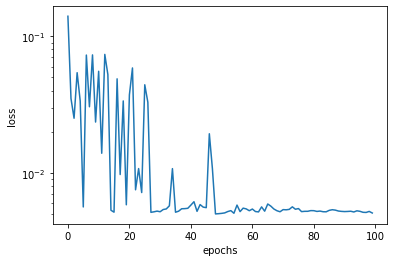

In [77]:
plt.semilogy(training_history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [78]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 50), 
    np.linspace(0, 1, 50)
)
print(x_test.shape)
print(t_test.shape)

(50, 50)
(50, 50)


In [79]:
u_pred = u.eval(model, [x_test, t_test])

C:\Users\YOUSSE~1\AppData\Local\Temp/ipykernel_16704/2269037451.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_test, t_test, u_pred, cmap='seismic')


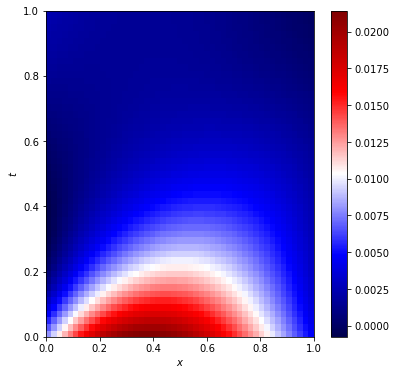

In [80]:
fig = plt.figure(figsize=(6, 6))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.colorbar()

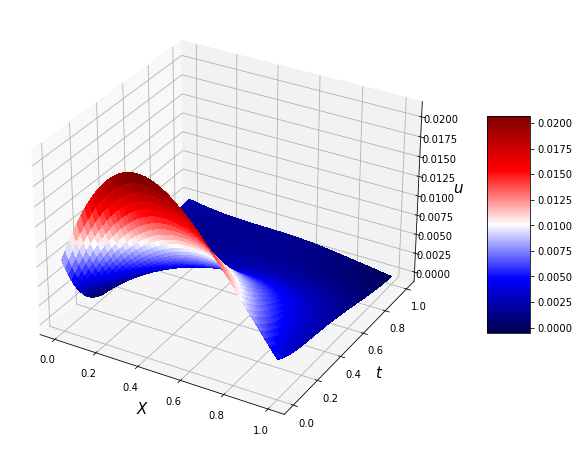

In [81]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_test, t_test, u_pred, rstride=1, cstride=1, cmap=cm.seismic, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$t$', fontsize=15)
ax.set_zlabel('$u$', fontsize=15)
plt.show()